In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

input = 'http://media.sundog-soft.com/SelfDriving/PastHires.csv'
df = pd.read_csv(input,header = 0)

In [3]:
df.head()

Years Experience Employed?  ...  Interned Hired
0                10         Y  ...         N     Y
1                 0         N  ...         Y     Y
2                 7         N  ...         N     N
3                 2         Y  ...         N     Y
4                20         N  ...         N     N

[5 rows x 7 columns]

In [4]:
d = {'Y':1,'N':0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS':0,'MS':1,'PhD':2}
df['Level of Education'] = df['Level of Education'].map(d)

In [5]:
df.head()

Years Experience  Employed?  ...  Interned  Hired
0                10          1  ...         0      1
1                 0          0  ...         1      1
2                 7          0  ...         0      0
3                 2          1  ...         0      1
4                20          0  ...         0      0

[5 rows x 7 columns]

In [6]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [7]:
y = df['Hired']
x = df[features]

clf = tree.DecisionTreeClassifier()

clf.fit(x,y)

DecisionTreeClassifier()

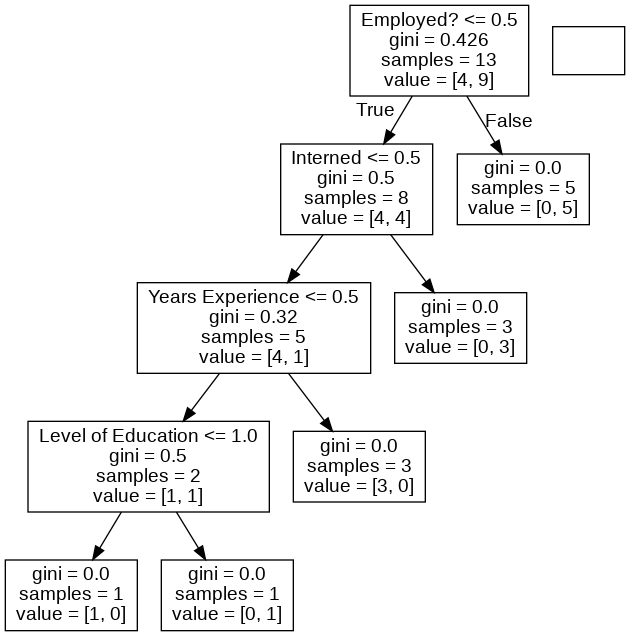

In [8]:
from IPython.display import Image
import six
import pydotplus

dot_data = six.StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [9]:
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

clf = RandomForestClassifier(n_estimators=10)
clf.fit(x,y)

print("Person A = ",clf.predict([[10,1,4,0,0,0]]))

print("Person B = ",clf.predict([[0,0.2,0,0,1,0]]))

Person A =  [1]
Person B =  [0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs

n = 10000
centres = [(0.9,0.05),(0.05,0.94)]
X,y = make_blobs(n,n_features=2,cluster_std=0.4,centers=centres,shuffle=False,random_state=42)

features = []
labels = []

for feature,label in zip(X,y):
    if(feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)
X = np.array(features)
y = np.array(labels)



In [14]:
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
from IPython.display import Image
import six
import pydotplus

dot_data = six.StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=['Distance','Bump Size'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.893832 to fit



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


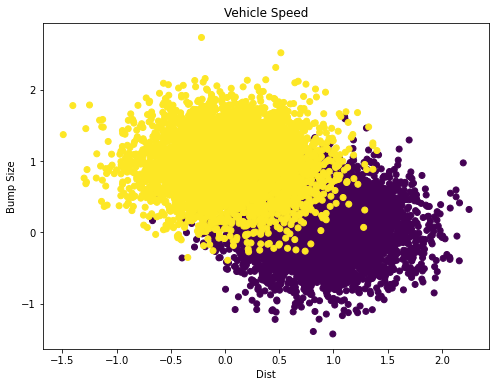

In [16]:
def predplot(clf):
    xx,yy = np.meshgrid(np.arange(0,1.0,0.001),np.arange(0,1.0,0.001))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

    plt.figure(figsize=(8,6))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)
    plt.scatter(X[:,0],X[:,1],c=y.astype(np.float))

    plt.xlabel("Dist")
    plt.ylabel("Bump Size")
    plt.title("Vehicle Speed")
    # plt.show()

predplot(clf)